In [14]:
%%sh 
apt-get -qq install tesseract-ocr cuneiform -y 

In [19]:
! pip install transformers[torch] datasets torch pyocr pandas numpy nlpaug tqdm huggingface_hub pytesseract --quiet

In [20]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests
import pytesseract
import pyocr

In [15]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-printed')

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
tools = pyocr.get_available_tools()

In [21]:
tools

[<module 'pyocr.tesseract' from '/usr/local/lib/python3.10/dist-packages/pyocr/tesseract.py'>,
 <module 'pyocr.libtesseract' from '/usr/local/lib/python3.10/dist-packages/pyocr/libtesseract/__init__.py'>,
 <module 'pyocr.cuneiform' from '/usr/local/lib/python3.10/dist-packages/pyocr/cuneiform.py'>]

In [23]:
image = Image.open("docs/phi_free_1_1.png")

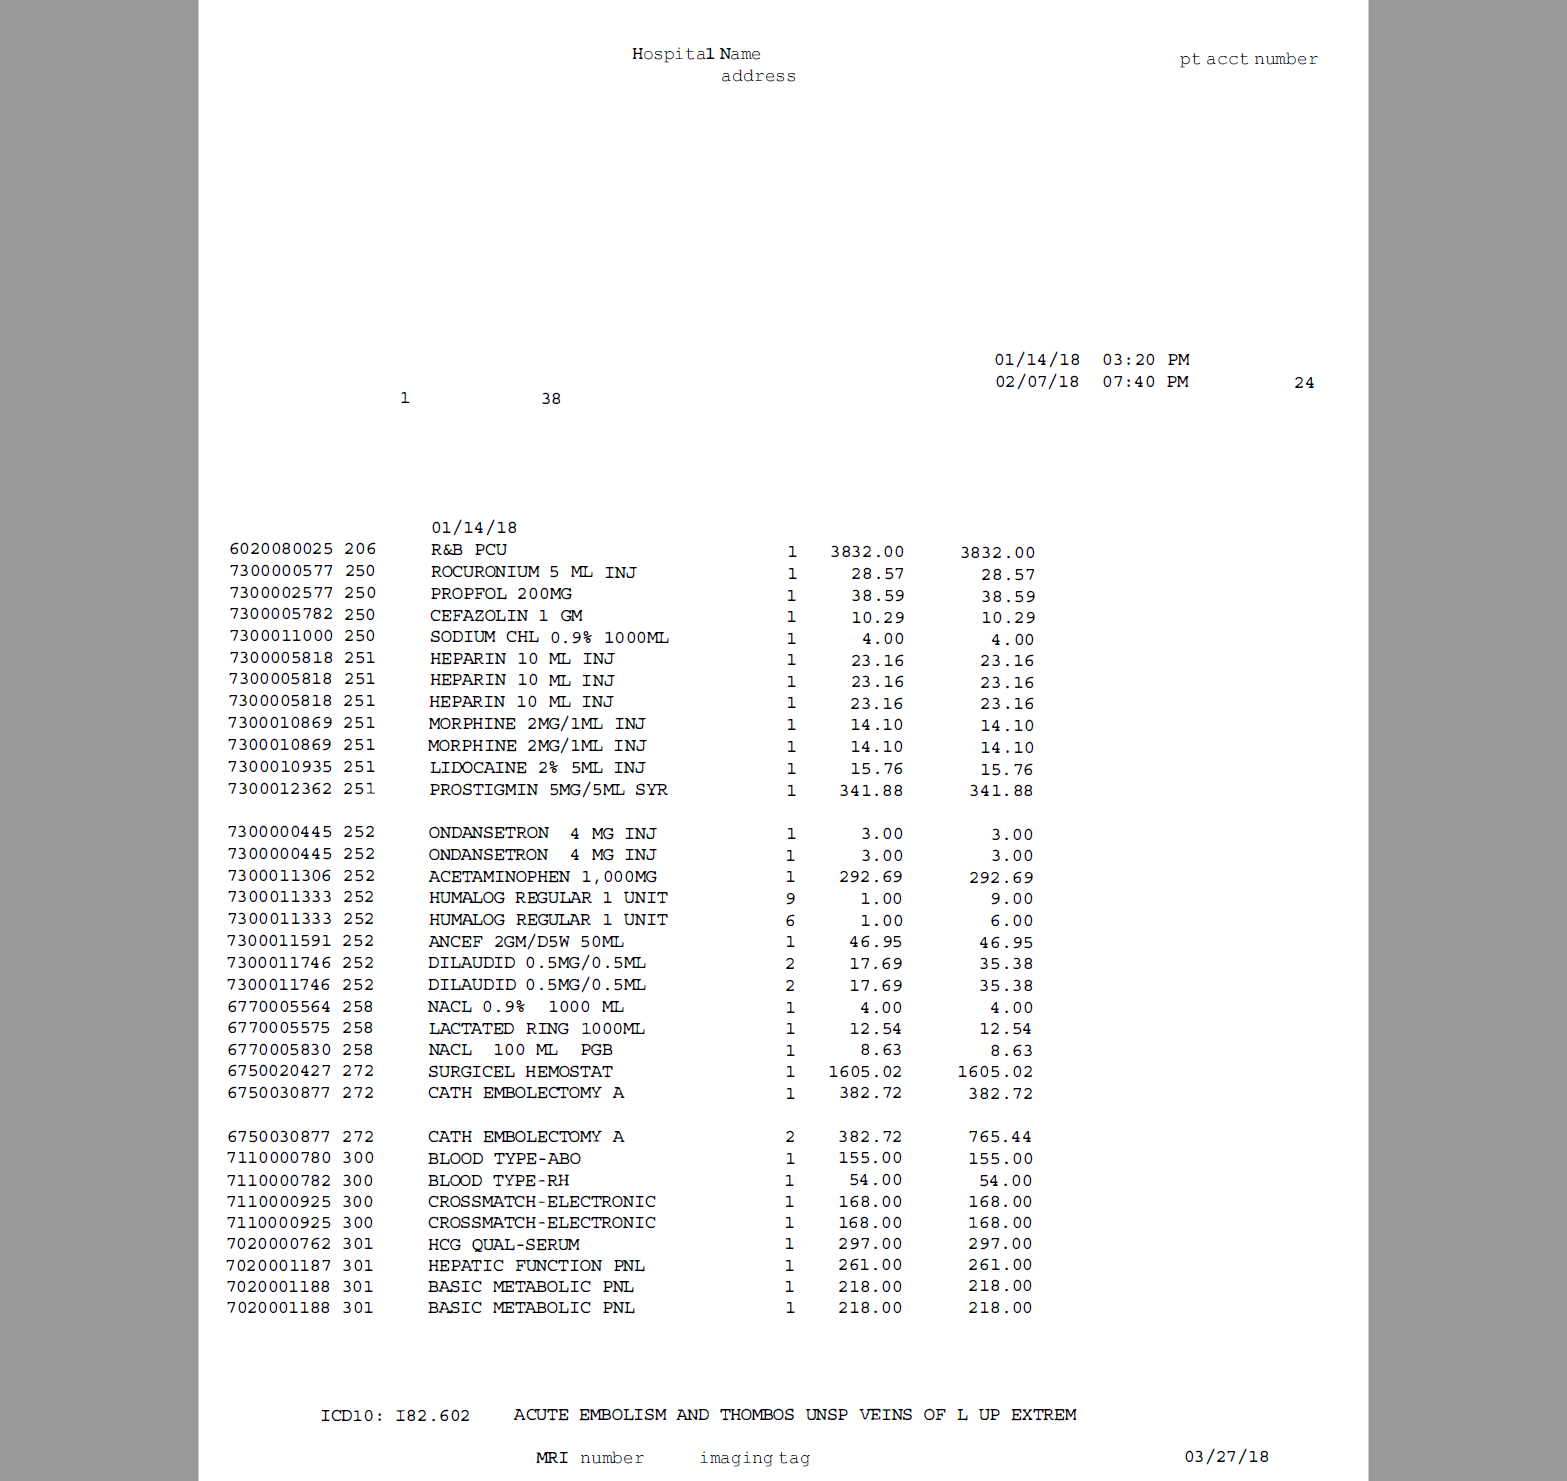

In [24]:
image

### Perform Text Extraction at the character level for each document

In [49]:

txt = tools[-1].image_to_string(
    image,
    lang="eng",
    builder=pyocr.builders.TextBuilder(cuneiform_singlecolumn=True)
)

txt.split("\n")

['Hv = I:IN: ',
 'Pt, . 7 ',
 '01/14/18 03 20 PM ',
 '02/07/18 07.40 PM 24 ',
 '38 ',
 '01/14/18 ',
 '6020080025 206 RSB PCJ I 3832.00 3832.00 ',
 '7300000577 250 RQCJRQNIUM 5 ML INJ I 28.57 28.57 ',
 '7300002577 250 PROPFOL 200MG I 38 59 38.59 ',
 '7300005782 250 CEFAZOLIN I GM 1 10 29 10.29 ',
 "7300011000 250 SODI'JM CHL 0.94 1000NL 1 4.00 4.00 ",
 '7300005818 251 HEPARIN 10 ML INJ I 23 16 23.16 ',
 '7300005818 251 HEPARIN 10 ML INJ I 23.16 23.16 ',
 '7300005818 251 HEPARIN 10 ML INJ I 23 16 23.16 ',
 '7300010869 251 MORPHINE 25G/IML INJ I 14.10 14.10 ',
 '7300010869 251 MORPHINE 25M/IML INJ 1 14.10 14.10 ',
 '7300010935 251 LIDOCAINE 24 5ML INJ I 15.76 15.76 ',
 "7300012362 25' PROSTIGMIN 5MG/5ML SYR 1 341.88 341.88 ",
 '7300000445 252 ONDANSETRON 4 IT INJ I 3.00 3.00 ',
 '7300000445 252 QNDANSETRON 4 FK INJ 1 3.00 3 00 ',
 '7100011306 252 ACETAMINOPHEN 1,000MG I 292.69 292.69 ',
 '7300011333 252 HJMALOG REGULAR I UNIT 9 1.00 9.00 ',
 '7100011333 252 HUMALOG REGJLAR 1 UNIT 6 1.00 6

In [51]:
txt = tools[0].image_to_string(
    image,
    lang="eng",
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)
txt.split("\n")

['Hospital Name pt acct number',
 'address',
 '01/14/18 03:20 PM',
 '02/07/18 07:40 PM 24',
 '1 38',
 '01/14/18',
 '6020080025 206 R&B PCU 1 3832.00 3832.00',
 '7300000577 250 ROCURONIUM 5 ML INT 1 28.57 28.57',
 '7300002577 250 PROPFOL 200MG 1 38.59 38.59',
 '7300005782 250 CEFAZOLIN 1 GM 1 10.29 10.29',
 '7300011000 250 SODIUM CHL 0.9% 1000ML 1 4.00 4.00',
 '7300005818 251 HEPARIN 10 ML INT 1 23.16 23.16',
 '7300005818 251 HEPARIN 10 ML INT 1 23.16 23.16',
 '7300005818 251 HEPARIN 10 ML INT 1 23.16 23.16',
 '7300010869 251 MORPHINE 2MG/1ML INT 1 14.10 14.10',
 '7300010869 251 MORPHINE 2MG/1ML INT 1 14.10 14.10',
 '7300010935 251 LIDOCAINE 2% 5ML INT 1 15.76 15.76',
 '7300012362 251 PROSTIGMIN 5MG/5ML SYR 1 341.88 341.88',
 '7300000445 252 ONDANSETRON 4 MG INU 1 3.00 3.00',
 '7300000445 252 ONDANSETRON 4 MG INT 1 3.00 3.00',
 '7300011306 252 ACETAMINOPHEN 1, 000MG 1 292.69 292.69',
 '7300011333 252 HUMALOG REGULAR 1 UNIT 9 1.00 9.00',
 '7300011333 252 HUMALOG REGULAR 1 UNIT 6 1.00 6.0

### Now look at each line item in order to generalize transformation logic implemented

##